In [58]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#For reading stock data from yahoo
from pandas.io.data import DataReader

#For time stamps
from datetime import datetime

#For division
from __future__ import division

This is my first experimental stock analysis project!  We'll start with some widely agknowledge defense companies:  Lockheed Martin Corporation,  The Boeing Company, Raytheon Company, General Dynamics Corporation, and Northrop Grumman Corporation.  This analysis project will be for the last 15 years. 

In [59]:
#The defense stocks I'll be analizing
defense_list = ['LMT','BA','RTN','GD','NOC']

#Set up start and end times for data analysis
end = datetime.now()
start = datetime(end.year - 15,end.month,end.day)


#Loop for grabbing Yahoo finance data and setting as DataFrame
for stock in defense_list:
    #Set DataFrame as stock ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

Lets play around with some data, and see what we're working with!

In [60]:
#General info for Boeing Company
BA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3777 entries, 2001-12-24 to 2016-12-22
Data columns (total 6 columns):
Open         3777 non-null float64
High         3777 non-null float64
Low          3777 non-null float64
Close        3777 non-null float64
Volume       3777 non-null int64
Adj Close    3777 non-null float64
dtypes: float64(5), int64(1)
memory usage: 206.6 KB


In [61]:
#Summary stats for Lockheed Martin Corporation
LMT.describe()

,Open,High,Low,Close,Volume,Adj Close
count,3777.000000,3777.000000,3777.000000,3777.000000,3.777000e+03,3777.000000
mean,102.413519,103.317159,101.517143,102.456566,2.259933e+06,86.401628
std,55.205975,55.521197,54.898844,55.224533,1.313515e+06,59.027263
min,41.310001,42.099998,40.639999,41.130001,3.219000e+05,28.078627
25%,64.019997,64.750000,63.400002,64.019997,1.425800e+06,44.860614
50%,81.639999,82.440002,80.860001,81.779999,1.949100e+06,64.236944
75%,109.230003,110.519997,108.000000,109.169998,2.687000e+06,85.437020
max,268.950012,269.899994,266.309998,267.619995,1.396230e+07,267.619995


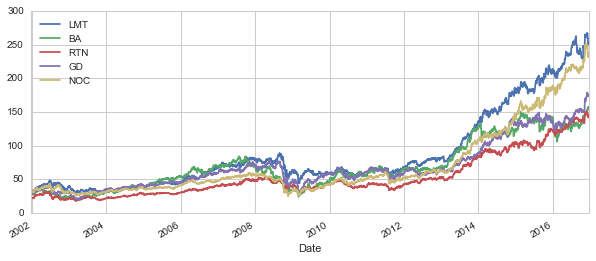

In [62]:
#Historical graph of closing priceses for our defense companies
LMT['Adj Close'].plot(legend=True,figsize=(10,4),label='LMT')
BA['Adj Close'].plot(legend=True,figsize=(10,4),label='BA')
RTN['Adj Close'].plot(legend=True,figsize=(10,4),label='RTN')
GD['Adj Close'].plot(legend=True,figsize=(10,4),label='GD')
NOC['Adj Close'].plot(legend=True,figsize=(10,4),label='NOC')

Now lets analize the corrilation of all these stocks closing price

In [63]:
#Grabbing all the data from the defense companies stock list into a DataFrame
closing_df = DataReader(['LMT','BA','RTN','GD','NOC'],'yahoo',start,end)['Adj Close']

In [64]:
closing_df.head()

,BA,GD,LMT,NOC,RTN
Date,,,,,
2001-12-24,27.449193,28.747541,31.218952,31.705973,21.263484
2001-12-26,27.577794,28.699654,31.198676,31.530678,21.562300
2001-12-27,27.642095,28.924357,31.360889,31.600795,21.630213
2001-12-28,27.935020,29.090125,31.624482,31.760154,21.869410
2001-12-31,27.706396,29.336932,31.543375,32.129865,22.190617


In [65]:
closing_df.tail()

,BA,GD,LMT,NOC,RTN
Date,,,,,
2016-12-16,154.500000,174.410004,250.080002,231.699997,141.820007
2016-12-19,156.179993,174.630005,252.179993,233.539993,142.979996
2016-12-20,156.389999,175.259995,253.729996,235.139999,143.820007
2016-12-21,157.479996,174.100006,252.520004,233.149994,142.559998
2016-12-22,157.460007,174.529999,252.800003,233.720001,143.309998


In [66]:
#Now making a new defense returns DataFrame
defense_rets = closing_df.pct_change()

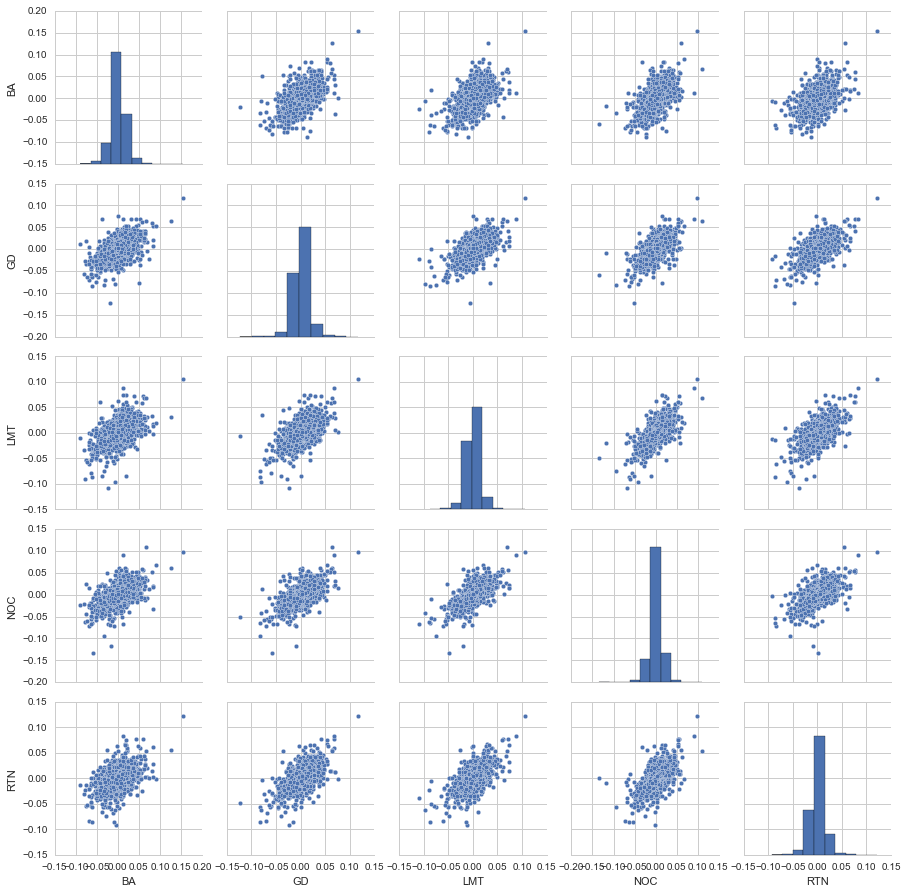

In [67]:
#Now analizing the daily percent return on all combinations of each stock
sns.pairplot(defense_rets.dropna())

Interesting.  They all seem to have similar corrilations as far as returns.  Lets check out how they compare according to their close price.

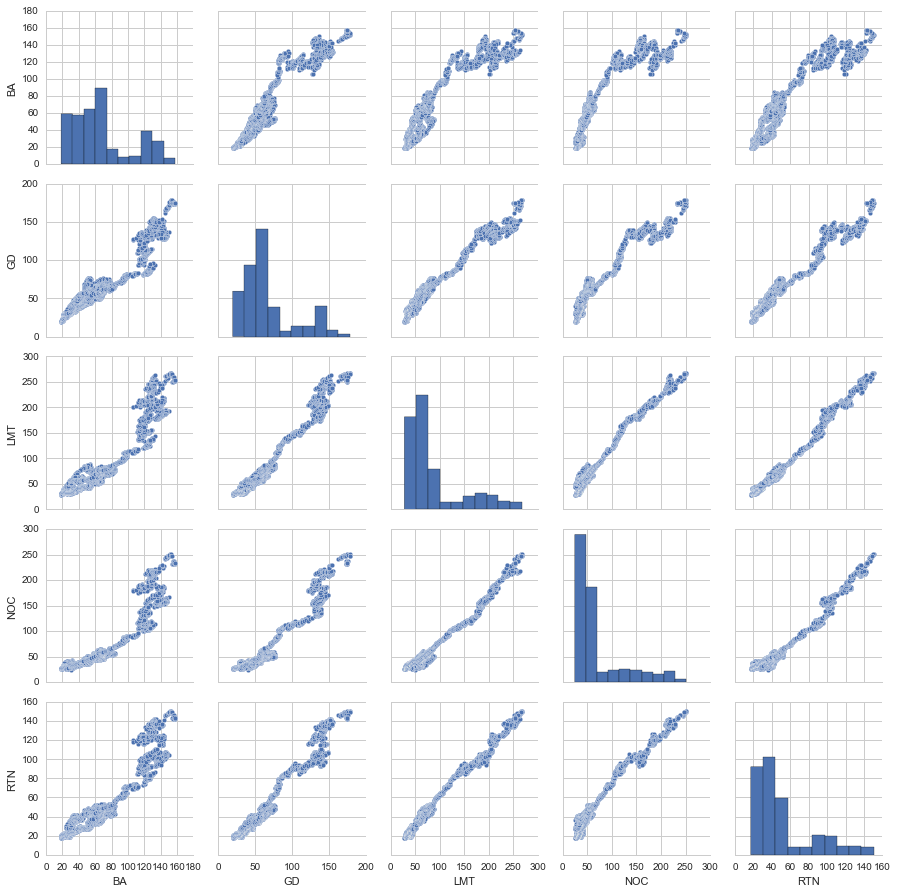

In [68]:
sns.pairplot(closing_df.dropna())

Wow! Almost a perfect linear corrilation of our defense companies close price.  Lets look at this in more detail.

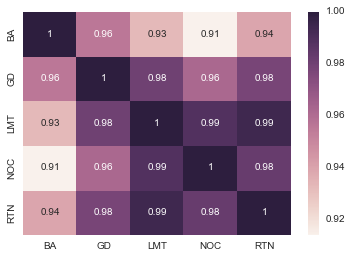

In [69]:
sns.heatmap(closing_df.corr(),annot=True)

Very high Pearson product-moment correlation coefficient when applied to the closing prices.

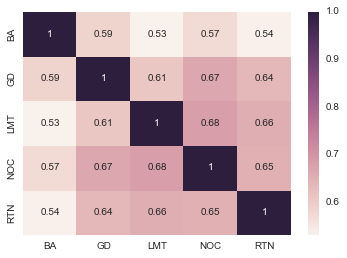

In [70]:
sns.heatmap(defense_rets.corr(),annot=True)

Pretty consistent as far as returns go.

# Risk Analysis

Lets see if we can quantify our risk.

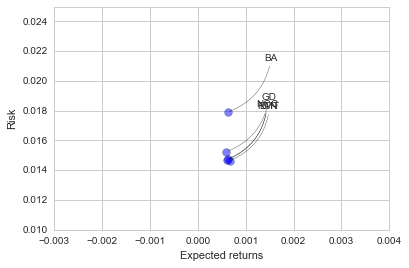

In [71]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = defense_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

Notice, they're all pretty similar as far as a risk to expected return ratio, with Boeing Company being possibly the least desirable amoung the our defense stock list.  What about The 0.05 empirical quantile of daily returns?

In [73]:
rets['LMT'].quantile(0.05)

-0.021466046992544785

In [74]:
rets['BA'].quantile(0.05)

-0.027944262560947619

In [75]:
rets['RTN'].quantile(0.05)

-0.022265847354863894

In [76]:
rets['GD'].quantile(0.05)

-0.022979496596003596

In [77]:
rets['NOC'].quantile(0.05)

-0.021466046992544785

In [81]:
#Taking the average empirical quantile for this portfolio
(rets['LMT'].quantile(0.05) + 
 rets['BA'].quantile(0.05) + 
 rets['RTN'].quantile(0.05) + 
 rets['GD'].quantile(0.05) + 
 rets['NOC'].quantile(0.05))/5

-0.023188915241791973

So our average emirical quantile for daily returns for this portfolio is at -0.023.  This means that with 95% confidence, our worst daily loss will not exceed 2.3%.

Now lets look at the value at risk for the Lockheed Martin Corporation using the Monte Carlo method.

In [82]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for
mu = rets.mean()['LMT']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['LMT']

In [83]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

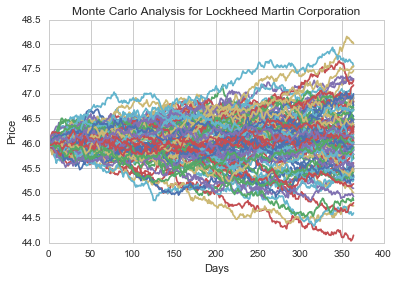

In [88]:
# Get start price from LMT.head()
start_price = 46

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Lockheed Martin Corporation')

Now a using a histogram of the end results for a much larger run.

In [89]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

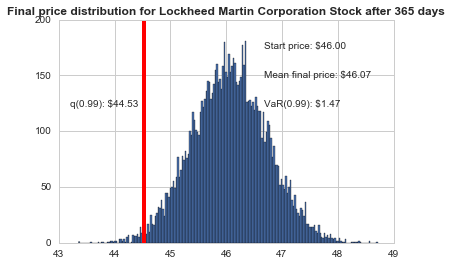

In [90]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Lockheed Martin Corporation Stock after %s days" % days, weight='bold');

Now we have analyzed the 1% empirical quantile of the final price distribution to estimate the value at risk for Lockheed Martin Corporation's stock, which is $\$$1.47 for every investment of $\$$46.00.  So every initial stock you purchase at $\$$46.00, you are putting $\$$1.47 at risk 99% of the time.
